# Xarray plot types
### Scott Wales, CLEX CMS

Let's look at the different types of plots that are available using Xarray.

As usual we'll start with some data from NCI

In [1]:
%matplotlib inline

import xarray
datapath = "http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-0/amip/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_amip_r1i1p1_197901-200812.nc"
data = xarray.open_dataset(datapath)
tas = data.tas.isel(time=0)

Calling `.plot()` on a xarray dataarray is a quick way to make a plot. It will choose a plot type based on the array dimension - if you get a histogram try reducing the number of dimensions using `.sel()` or `.isel()`

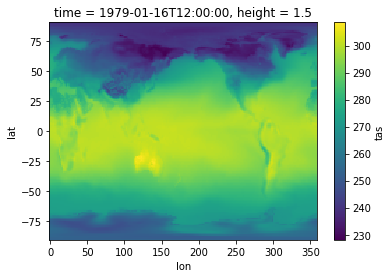

In [2]:
tas.plot()

---

There are four basic plot types for 2d data
 - `pcolormesh` - colourised image
 - `imshow` - colourised image
 - `contourf` - filled contours
 - `contour` - empty contours
 
`pcolormesh` and `imshow` are basically the same, but imshow has more control over the colours - you can for instance specify different arrays for the red, green and blue components

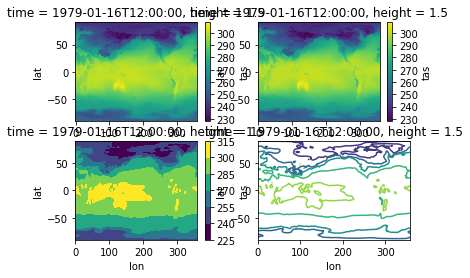

In [3]:
import matplotlib.pyplot as plt

ax={}
for i in range(4):
    ax[i] = plt.subplot(2,2,i+1)

tas.plot.pcolormesh(ax=ax[0])
tas.plot.imshow(ax=ax[1])
tas.plot.contourf(ax=ax[2])
tas.plot.contour(ax=ax[3])

By default the plots come with a colour bar and title, however you can disable those in order to replace them with your own

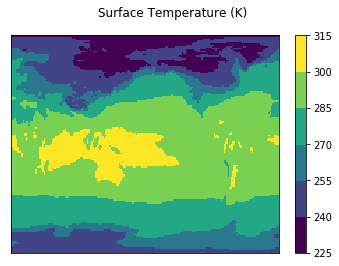

In [16]:
tas.plot.pcolormesh(levels=7, add_colorbar=True, add_labels=False)

plt.suptitle("Surface Temperature (K)")
plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)

You can also specify the axis to create a plot on, which is useful for subplots and cartopy projections.

Note that while pyplot's `imshow()` function only shows a rectangular image cartopy's projections still work to project the data onto a globe

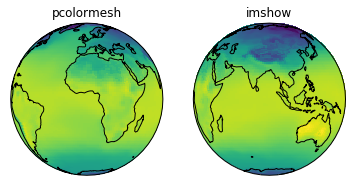

In [29]:
import cartopy.crs as ccrs

ax = [
    plt.subplot(121, projection=ccrs.Orthographic()),
    plt.subplot(122, projection=ccrs.Orthographic(central_longitude=90)),
]

ax[0].set_title('pcolormesh')
tas.plot.pcolormesh(ax=ax[0], transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False)
ax[0].coastlines()

ax[1].set_title('imshow')
tas.plot.imshow(ax=ax[1], transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False)
ax[1].coastlines()